In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis, norm
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [220]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
# df_train.shape
df_train.info() #columns name --> feature name

In [222]:
df_train.select_dtypes(include=['float64','int64']).info()  #Data set information --> data number and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [ ]:
df_train['SalePrice'].describe() #for numerical data

In [ ]:
df_train['Electrical'].describe() #for categorical data

In [ ]:
sns.distplot(df_train['SalePrice'], kde=False) #show the distribution of the data

In [ ]:
sns.distplot(np.log1p(df_train['SalePrice']), kde=False) #convert data to normal distribution

In [ ]:
print('Skewness: %f' % df_train['SalePrice'].skew())  #measure of deviation from normal distribution
print('Kurtosis: %f' % df_train['SalePrice'].kurt())  #kurtosis of a dataset

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice')
# sns.regplot(x='GrLivArea', y='SalePrice', data=data)

In [ ]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

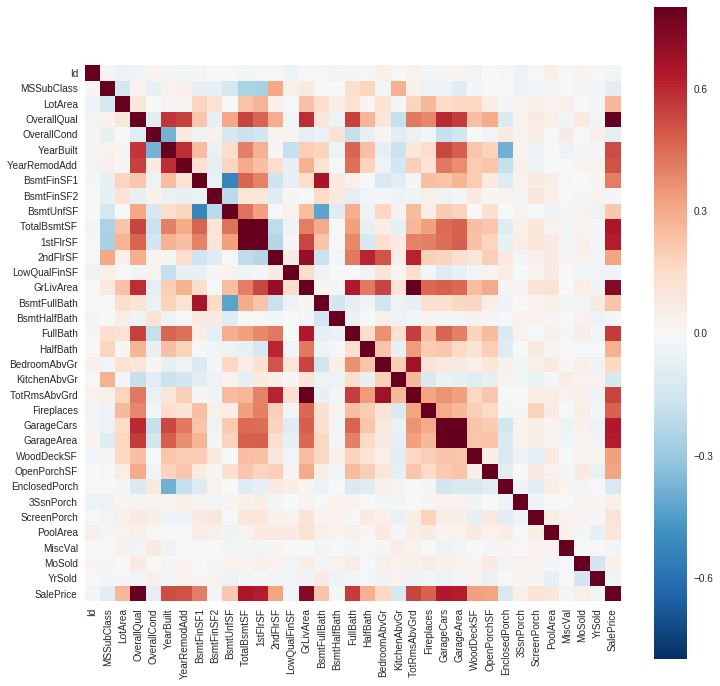

In [144]:
#correlation matrix, a more object analysis of the data set wrt sale price
corrmat = df_train.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, vmax=0.8, square=True)

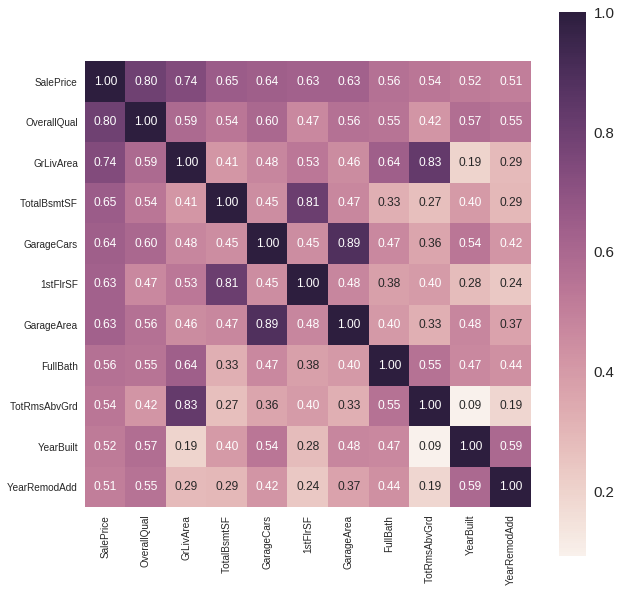

In [146]:
#saleprice correlation
k = 11 #number of variables for the heatmap
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
plt.subplots(figsize=(10,10))
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols.values, xticklabels=cols.values)

In [25]:
#finding out the features with missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [26]:
#dealing with features with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, axis=1)
df_train['Electrical'] = df_train['Electrical'].fillna('SBrkr') #filled with most frequent value
# df_train.isnull().sum().max() #just checking that there's no missing data missing...

Univariate Analysis

Standardize the data to values with 0 mean and a standard deviation of 1

In [ ]:
#standardizing the sale price
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
#Deleting Outliers: the two largest GrLivArea with low sale price can be considered as outliers

df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
# Lets try to delete those points with TotalBsmtSF == 0 ....
df_train = df_train.drop(df_train[df_train['TotalBsmtSF'] == 0].index)

In [ ]:
#Create a new feature to represent houses with or without basement (TotalBsmtSF == 0)
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt'] = 1

In [ ]:
df_train.loc[df_train['HasBsmt'] == 0]

In [ ]:
#data transform
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [ ]:
#data transformation for TotalBsmtSF for training data
df_train['TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

In [ ]:
#bivariate analysis SalePrice/GrLivArea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
#data transformation for TotalBsmtSF for training data
df_test['TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [ ]:
#data transformation for GrLivArea for training data
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

In [ ]:
#data transformation for GrLivArea for test data
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [ ]:
#applying log transformation 
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

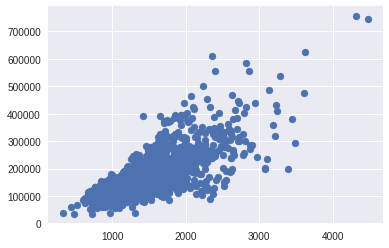

In [8]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

In [27]:
#Deleting Outliers: the two largest GrLivArea with low sale price can be considered as outliers

df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [ ]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

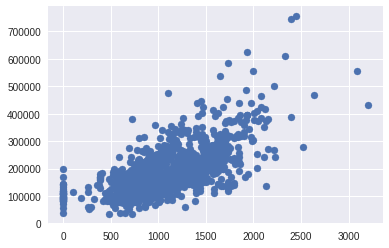

In [11]:
plt.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])

In [28]:
#Deleting Outliers: the smallest TotalBsmtSF with high sale price can be considered as outliers

df_train.sort_values(by = 'TotalBsmtSF', ascending=False)[:1]
df_train = df_train.drop(df_train[df_train['Id'] == 333].index)

In [173]:
#Select first seven most correlated features as training data

X_train = df_train[['Id','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','SalePrice']]
X_test = df_test[['Id','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]

In [174]:
total = X_test.isnull().sum().sort_values(ascending=False)
percent = (X_test.isnull().sum()/X_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
TotalBsmtSF,1,0.000685
GarageCars,1,0.000685
YearRemodAdd,0,0.000000
YearBuilt,0,0.000000
TotRmsAbvGrd,0,0.000000


In [175]:
# fill missing data with median value

X_test.loc[X_test['TotalBsmtSF'].isnull(), 'TotalBsmtSF'] = X_test['TotalBsmtSF'].median()
X_test.loc[X_test['GarageCars'].isnull(), 'GarageCars'] = X_test['GarageCars'].median()

# X_test.isnull().sum().sort_values(ascending=False)

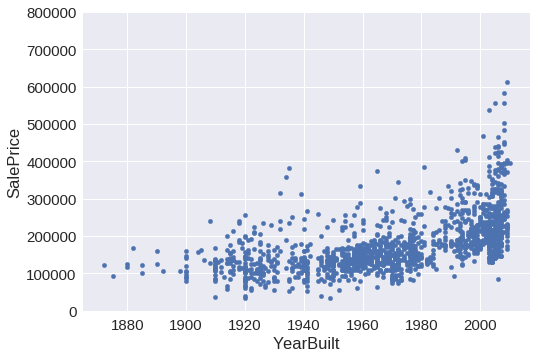

In [179]:
#year built with SalePrice
var = 'YearBuilt'
data = pd.concat([X_train['SalePrice'], X_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# I want to delete those four points with high saleprice and oldest yearbuilt

In [178]:
# X_train.loc[(X_train['YearBuilt']<1900)&(X_train['SalePrice']>200000),'Id']
# X_train.loc[(X_train['YearBuilt']<2000)&(X_train['YearBuilt']>1980)&(X_train['SalePrice']>600000),'Id']

idx = [186, 305, 584, 748, 692, 1170, 1183]

for i in idx:
    X_train = X_train.drop(X_train[X_train['Id']==i].index)

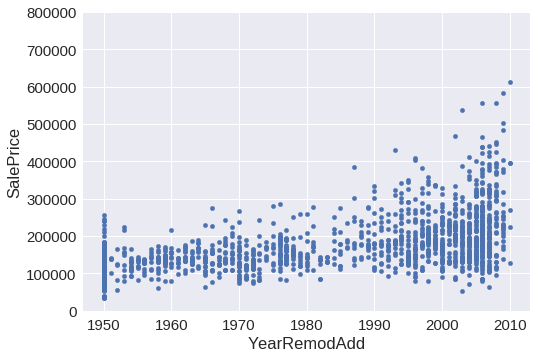

In [163]:
#year remod with SalePrice
var = 'YearRemodAdd'
data = pd.concat([X_train['SalePrice'], X_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [180]:
# X_train.loc[(X_train['YearRemodAdd']<1970)&(X_train['YearRemodAdd']>1960)&(X_train['SalePrice']>300000),'Id']
X_train = X_train.drop(X_train[X_train['Id']==314].index)

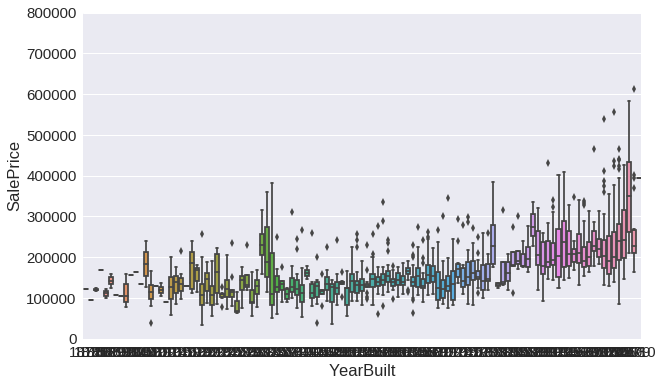

In [181]:
var = 'YearBuilt'
data = pd.concat([X_train['SalePrice'], X_train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

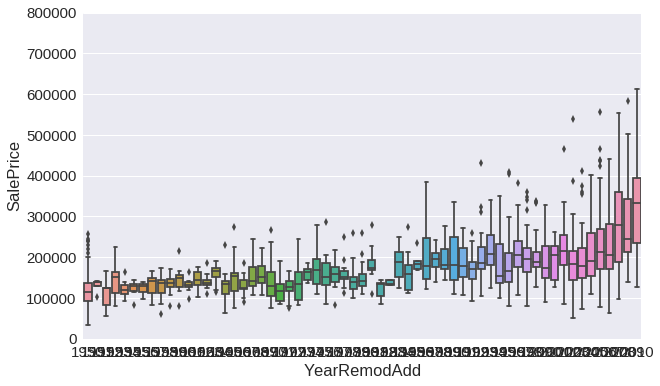

In [167]:
var = 'YearRemodAdd'
data = pd.concat([X_train['SalePrice'], X_train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [186]:
# Convert yearbuilt info into degree of oldness
combine = [X_train, X_test]

for dataset in combine:
    dataset.loc[(dataset['YearBuilt'] <= 1900), 'HouseAge'] = 7 # Oldest
    dataset.loc[(dataset['YearBuilt'] > 1900) & (dataset['YearBuilt'] <= 1920), 'HouseAge'] = 6
    dataset.loc[(dataset['YearBuilt'] > 1920) & (dataset['YearBuilt'] <= 1940), 'HouseAge'] = 5
    dataset.loc[(dataset['YearBuilt'] > 1940) & (dataset['YearBuilt'] <= 1960), 'HouseAge'] = 4
    dataset.loc[(dataset['YearBuilt'] > 1960) & (dataset['YearBuilt'] <= 1980), 'HouseAge'] = 3
    dataset.loc[(dataset['YearBuilt'] > 1980) & (dataset['YearBuilt'] <= 2000), 'HouseAge'] = 2
    dataset.loc[(dataset['YearBuilt'] > 2000), 'HouseAge'] = 1

In [187]:
for dataset in combine:
    dataset.loc[(dataset['YearRemodAdd']<=1980),'RemodAge'] = 4
    dataset.loc[(dataset['YearRemodAdd']>1980)&(dataset['YearRemodAdd']<=1990),'RemodAge'] = 3
    dataset.loc[(dataset['YearRemodAdd']>1990)&(dataset['YearRemodAdd']<=2000),'RemodAge'] = 2
    dataset.loc[(dataset['YearRemodAdd']>2000),'RemodAge'] = 1

In [188]:
X_train.describe()

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice,HouseAge,RemodAge
count,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000
mean,730.981366,6.077295,1500.109731,1.759144,1047.227743,1.558316,6.493444,1971.385783,1984.771567,179196.146998,2.951001,2.535542
std,421.903898,1.359777,486.718396,0.742802,407.374096,0.544512,1.601576,29.922429,20.671754,75172.031192,1.587573,1.320895
min,1.000000,1.000000,334.000000,0.000000,0.000000,0.000000,2.000000,1872.000000,1950.000000,34900.000000,1.000000,1.000000
25%,367.000000,5.000000,1128.000000,1.000000,794.000000,1.000000,5.000000,1954.000000,1966.000000,129900.000000,2.000000,1.000000
50%,732.000000,6.000000,1456.000000,2.000000,990.000000,2.000000,6.000000,1973.000000,1993.000000,162500.000000,3.000000,2.000000
75%,1095.000000,7.000000,1768.000000,2.000000,1288.000000,2.000000,7.000000,2000.000000,2004.000000,213000.000000,4.000000,4.000000
max,1460.000000,10.000000,3447.000000,4.000000,3200.000000,3.000000,14.000000,2010.000000,2010.000000,611657.000000,7.000000,4.000000


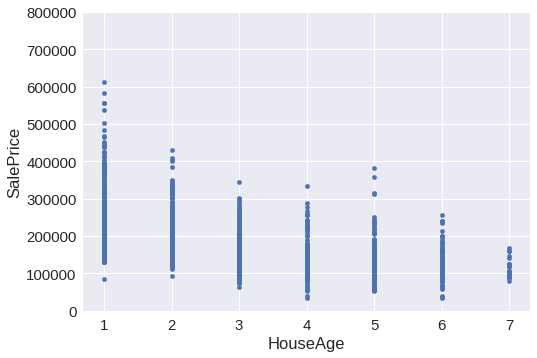

In [189]:
#year built with SalePrice
var = 'HouseAge'
data = pd.concat([X_train['SalePrice'], X_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# I want to delete those three points with high saleprice and old yearbuilt

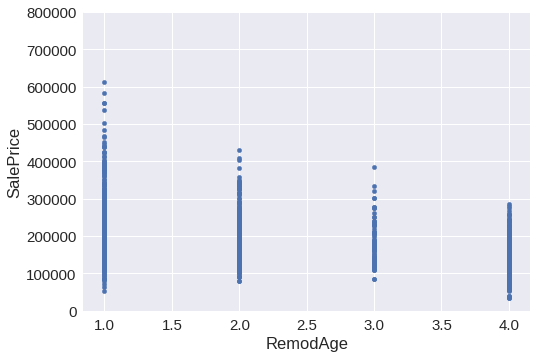

In [190]:
#year built with SalePrice
var = 'RemodAge'
data = pd.concat([X_train['SalePrice'], X_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
#finding Outliers:

#X_train.loc[X_train['HouseAge']==2].sort_values(by = 'SalePrice', ascending=False)[:3]
#X_train = df_train.drop(df_train[df_train['Id'] == 333].index)

In [ ]:
#delete outliers

X_train = X_train.drop(X_train[X_train['Id'] == 692].index)
X_train = X_train.drop(X_train[X_train['Id'] == 1183].index)
X_train = X_train.drop(X_train[X_train['Id'] == 1170].index)

In [192]:
Y_train = X_train['SalePrice']
X_train = X_train.drop(['SalePrice','Id','YearBuilt','YearRemodAdd'], axis=1)
X_test = X_test.drop(['YearBuilt','Id','YearRemodAdd'], axis = 1)

In [193]:
X_test.describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,HouseAge,RemodAge
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000
mean,6.078821,1486.045922,1.766278,1046.078136,1.570939,6.385195,2.95682,2.588074
std,1.436812,485.566099,0.775703,442.749327,0.555190,1.508895,1.61149,1.330097
min,1.000000,407.000000,0.000000,0.000000,0.000000,3.000000,1.00000,1.000000
25%,5.000000,1117.500000,1.000000,784.000000,1.000000,5.000000,1.00000,1.000000
50%,6.000000,1432.000000,2.000000,988.000000,2.000000,6.000000,3.00000,2.000000
75%,7.000000,1721.000000,2.000000,1304.000000,2.000000,7.000000,4.00000,4.000000
max,10.000000,5095.000000,5.000000,5095.000000,4.000000,15.000000,7.00000,4.000000


In [194]:
X_train.describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,HouseAge,RemodAge
count,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000
mean,6.077295,1500.109731,1.759144,1047.227743,1.558316,6.493444,2.951001,2.535542
std,1.359777,486.718396,0.742802,407.374096,0.544512,1.601576,1.587573,1.320895
min,1.000000,334.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000
25%,5.000000,1128.000000,1.000000,794.000000,1.000000,5.000000,2.000000,1.000000
50%,6.000000,1456.000000,2.000000,990.000000,2.000000,6.000000,3.000000,2.000000
75%,7.000000,1768.000000,2.000000,1288.000000,2.000000,7.000000,4.000000,4.000000
max,10.000000,3447.000000,4.000000,3200.000000,3.000000,14.000000,7.000000,4.000000


In [ ]:
combine = pd.concat((df.loc[:,'MSSubClass':'SaleCondition'], td.loc[:,'MSSubClass':'SaleCondition']))
#df['SalePrice'] = np.log1p(df['SalePrice'])

num_feats = combine.dtypes[combine.dtypes != 'object'].index
skew_feats = combine[num_feats].apply(lambda x: skew(x.dropna()))
skew_feats = skew_feats[skew_feats > 0.75].index
# skew_feats = skew_feats.index

combine[skew_feats] = np.log1p(combine[skew_feats])

# only numerical features !!
X_train = combine[:df.shape[0]]
X_test = combine[df.shape[0]:]
Y_train = df['SalePrice']

In [195]:
#Linear Regression

from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv=5))
    return rmse

In [196]:
lasso = LassoCV(alphas=[0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], cv=5)  # L1 regularization, alpha is the rate
lasso.fit(X_train, Y_train)
acc_lasso = round(lasso.score(X_train, Y_train) * 100, 2)
acc_lasso

81.97

In [197]:
rmse_cv(lasso).mean()
lasso.alpha_

1.0

In [198]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 0 variables


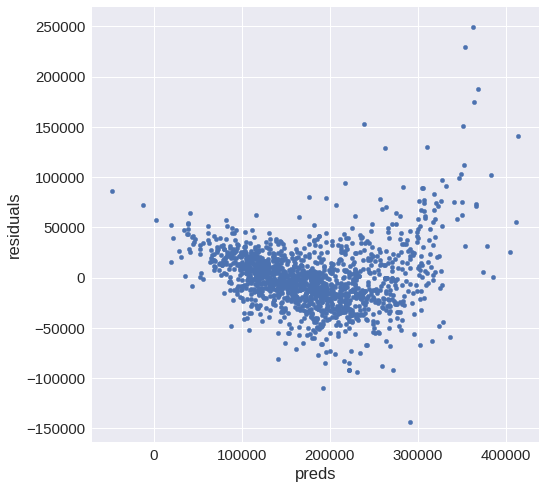

In [199]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (8.0, 8.0)

preds = pd.DataFrame({"preds":lasso.predict(X_train), "true":Y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

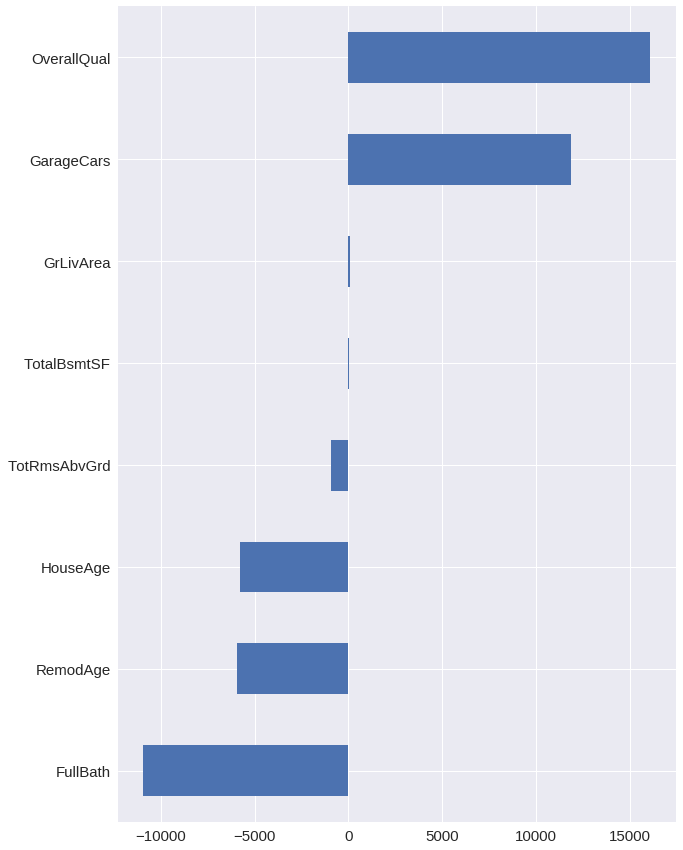

In [200]:
plt.subplots(figsize=(10,15))
coef.sort_values().plot(kind='barh')

In [201]:
ridge = RidgeCV(alphas=[0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], cv=5)  # L1 regularization, alpha is the rate
ridge.fit(X_train, Y_train)
acc_ridge = round(ridge.score(X_train, Y_train) * 100, 2)
acc_ridge

81.97

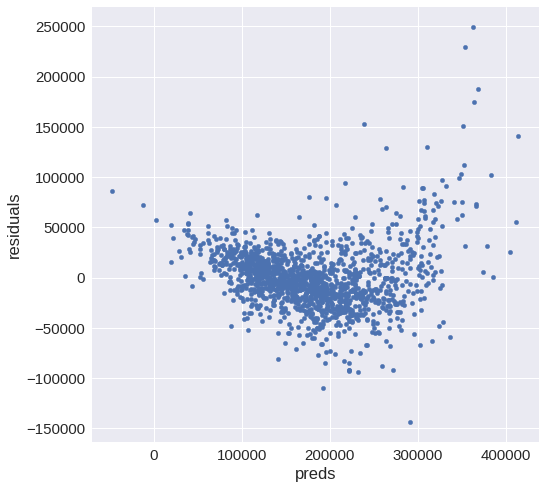

In [202]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)

preds = pd.DataFrame({"preds":ridge.predict(X_train), "true":Y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [78]:
coef = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 7 variables and eliminated the other 0 variables


In [79]:
ridge.alpha_

1

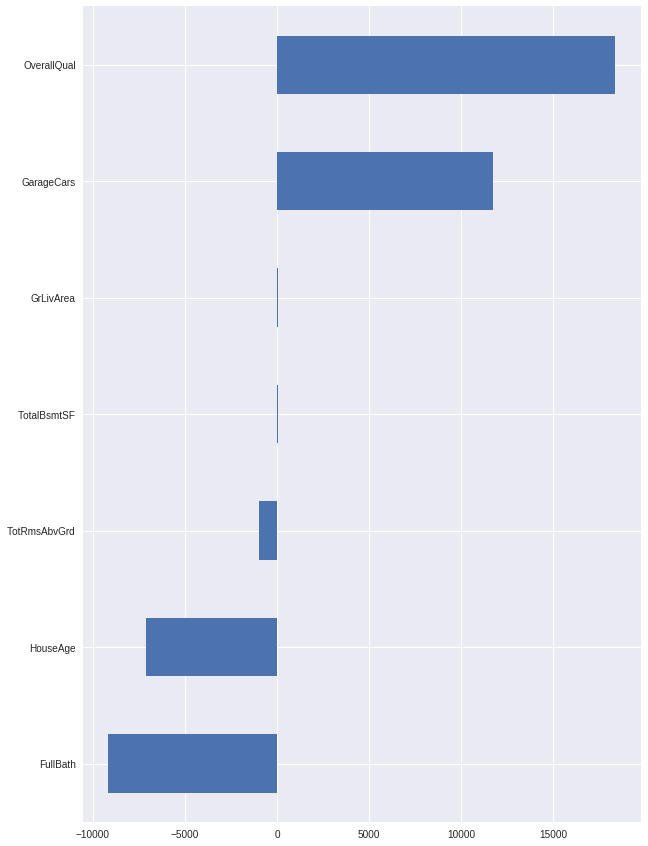

In [80]:
plt.subplots(figsize=(10,15))
coef.sort_values().plot(kind='barh')

In [203]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor

In [204]:
#bagging

bagging = BaggingRegressor(n_estimators = 10)
bagging.fit(X_train, Y_train)
acc_bagging = round(bagging.score(X_train, Y_train) * 100, 2)
acc_bagging

97.4

In [205]:
#Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
acc_dt = round(dt.score(X_train, Y_train) * 100, 2)
acc_dt

99.88

In [206]:
#Random Forest
rf = RandomForestRegressor(n_estimators = 40)
rf.fit(X_train, Y_train)
acc_rf = round(rf.score(X_train, Y_train) * 100, 2)
acc_rf

97.79

In [214]:
#Gradient Boost
gb = GradientBoostingRegressor(n_estimators=300)
gb.fit(X_train, Y_train)
acc_gb = round(gb.score(X_train, Y_train) * 100, 2)
acc_gb

95.39

In [208]:
import xgboost as xgb

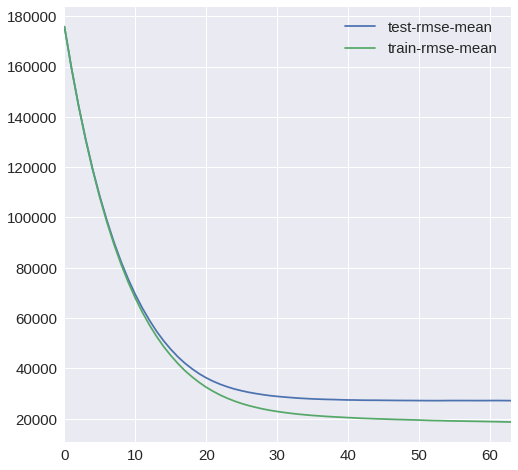

In [209]:
dtrain = xgb.DMatrix(X_train, label = Y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":4, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)


model.loc[:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [210]:
model_xgb = xgb.XGBRegressor(n_estimators=300, max_depth=4, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [211]:
xgb_preds = model_xgb.predict(X_test)
ridge_preds = ridge.predict(X_test)
lasso_preds = lasso.predict(X_test)
bagging_preds = bagging.predict(X_test)
gb_preds = gb.predict(X_test)
rf_preds = rf.predict(X_test)
dt_preds = dt.predict(X_test)

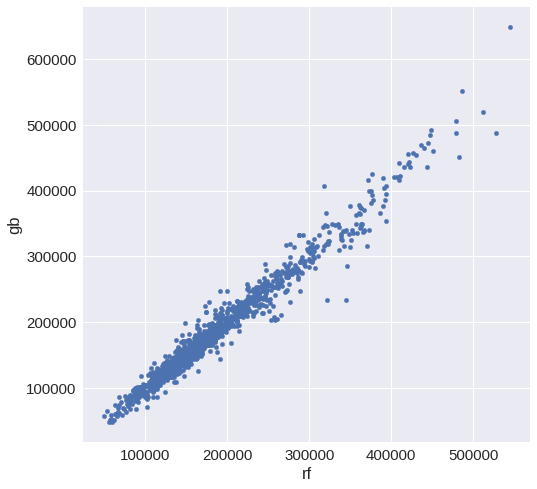

In [212]:
predictions = pd.DataFrame({"rf":rf_preds, "gb":gb_preds})
# plt.subplots(figsize=(8,8))
predictions.plot(x = "rf", y = "gb", kind = "scatter", figsize=(8,8))

In [213]:
solution = pd.DataFrame({"id":df_test.Id, "SalePrice":gb_preds})
solution.to_csv("gb_sol.csv", index = False)

#Gradient Boost has the best score on kaggle......